In [ ]:
#importing libararies
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api  as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("Use motor data.xlsx")
df

,Car Model,Mileage,Sell Price($),Age(Yrs)
0,BMWX5,69000,18000,6
1,BMWX5,35000,34000,3
2,BMWX5,57000,26100,5
3,BMWX5,22500,40000,2
4,BMWX5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez,67000,22000,6


In [3]:
df.describe()

,Mileage,Sell Price($),Age(Yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


In [4]:
X1 = df['Mileage']
Y = df['Sell Price($)']

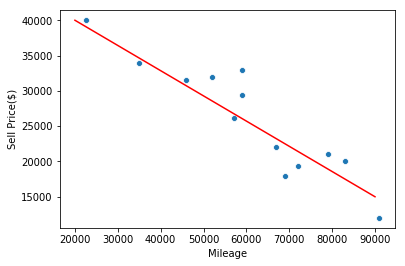

In [5]:
sns.scatterplot(X1 ,Y)
plt.plot([90000,20000], [15000,40000],'r' )

In [6]:
X = sm.add_constant(X1) 
results = sm.OLS(Y,X).fit()

In [7]:
results.summary()

C:\Users\AKINSOJI\Anaconda3-self\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Sell Price($)   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     67.32
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           5.13e-06
Time:                        15:53:57   Log-Likelihood:                -122.01
No. Observations:                  13   AIC:                             248.0
Df Residuals:                      11   BIC:                             249.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.957e+04   2998.729     16.531      0.000     4.3e+04    5.62e+04
Mileage       -0.3868      0.047     -8.205      0.000      -0.491      -0.283
==============================================================================
Omnibus:                        0.835   Durbin-Watson:                   0.731
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.537
Skew:                           0.457   Prob(JB):                        0.765
Kurtosis:                       2.605   Cond. No.                     2.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:

results.predict(X)


0     22884.340061
1     36034.308714
2     27525.505468
3     40868.856013
4     31779.907091
5     26751.977900
6     29459.324388
7     21724.048710
8     14375.536815
9     23657.867629
10    17469.647086
11    19016.702222
12    26751.977900
dtype: float64

from tha above analysis there is autocorrelation  because Durbin - Watson value = 0.731 less than 1


In [9]:
nX = np.log(X1)
nY = np.log(Y)

In [10]:
nXX = sm.add_constant(nX)
sm.OLS(nY, nXX).fit()

Multiple regression model using statsmodel



In [11]:
le = LabelEncoder()
df['Car Model'] = le.fit_transform(df['Car Model'])
df

,Car Model,Mileage,Sell Price($),Age(Yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [12]:

Xk = df[['Car Model', 'Mileage']]
Ym = df['Sell Price($)']
Xm = sm.add_constant(Xk)

In [13]:
Km = sm.OLS(Ym,Xm ).fit()
Km.summary()

C:\Users\AKINSOJI\Anaconda3-self\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Sell Price($)   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     34.05
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           3.44e-05
Time:                        15:54:24   Log-Likelihood:                -121.41
No. Observations:                  13   AIC:                             248.8
Df Residuals:                      10   BIC:                             250.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.869e+04   3134.132     15.534      0.000    4.17e+04    5.57e+04
Car Model   1095.4125   1112.272      0.985      0.348   -1382.885    3573.710
Mileage       -0.3902      0.047     -8.244      0.000      -0.496      -0.285
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.491
Skew:                           0.323   Prob(JB):                        0.782
Kurtosis:                       2.299   Cond. No.                     2.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""